In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
anime = pd.read_csv(r"C:\Users\ASUS\Desktop\segregation\Anime\anime.csv")
rating = pd.read_csv(r"C:\Users\ASUS\Desktop\segregation\Anime\rating.csv")

In [3]:
print(f"Shape of The Anime Dataset : {anime.shape}")
print(f"\nGlimpse of The Dataset :")
anime.head()

Shape of The Anime Dataset : (12294, 7)

Glimpse of The Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
print(f"Informations About Anime Dataset :\n")
print(anime.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [5]:
print(f"Shape of The Rating Dataset : {rating.shape}")
print(f"\nGlimpse of The Dataset :")
rating.head()

Shape of The Rating Dataset : (7813737, 3)

Glimpse of The Dataset :


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
print(f"Informations About Rating Dataset :\n")
print(rating.info())

Informations About Rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [7]:
print(f"Summary of The Anime Dataset :")
anime.describe().T

Summary of The Anime Dataset :


,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [8]:
anime.describe(include=object).T

,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


In [9]:
print("Null Values of Anime Dataset :")
anime.isna().sum().to_frame().T

Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,62,25,0,230,0


In [10]:
print("After Dropping, Null Values of Anime Dataset :")
anime.dropna(axis = 0, inplace = True)
anime.isna().sum().to_frame().T

After Dropping, Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,0


In [11]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 12017 entries in anime dataset.


In [12]:
print(f"Summary of The Rating Dataset :")
rating.describe().T

Summary of The Rating Dataset :


,count,mean,std,min,25%,50%,75%,max
user_id,7813737.0,36727.956745,20997.946119,1.0,18974.0,36791.0,54757.0,73516.0
anime_id,7813737.0,8909.072104,8883.949636,1.0,1240.0,6213.0,14093.0,34519.0
rating,7813737.0,6.144030,3.727800,-1.0,6.0,7.0,9.0,10.0


In [13]:
print("Null Values of Rating Dataset :")
rating.isna().sum().to_frame().T

Null Values of Rating Dataset :


,user_id,anime_id,rating
0,0,0,0


In [14]:
dup_rating = rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")

There are 1 duplicate entries among 7813737 entries in rating dataset.

After removing duplicate entries there are 7813736 entries in this dataset.


In [15]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head()

Shape of The Merged Dataset : (7813610, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


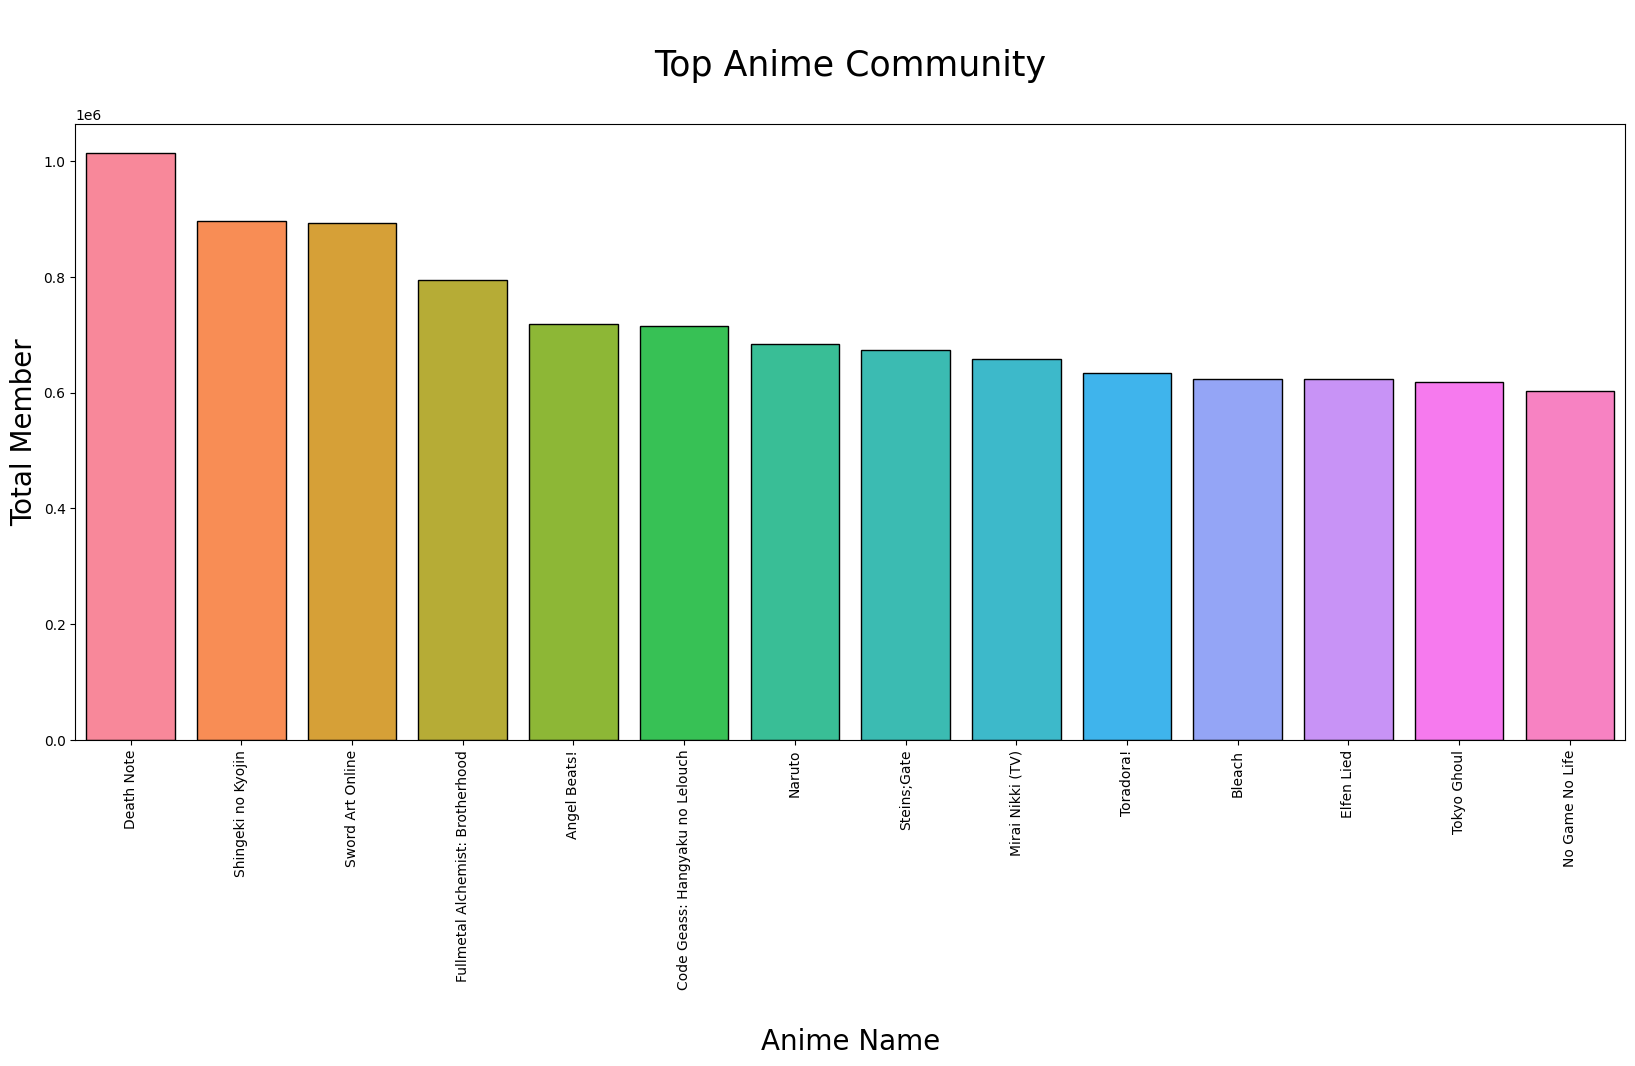

In [16]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))

p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"], saturation=1, edgecolor = "black", linewidth = 1)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)

plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [17]:
print("Anime Catogaries:")
top_anime_temp1["type"].value_counts().to_frame().T

Anime Catogaries:


,TV,OVA,Movie,Special,ONA,Music
type,3402,3090,2111,1581,526,451


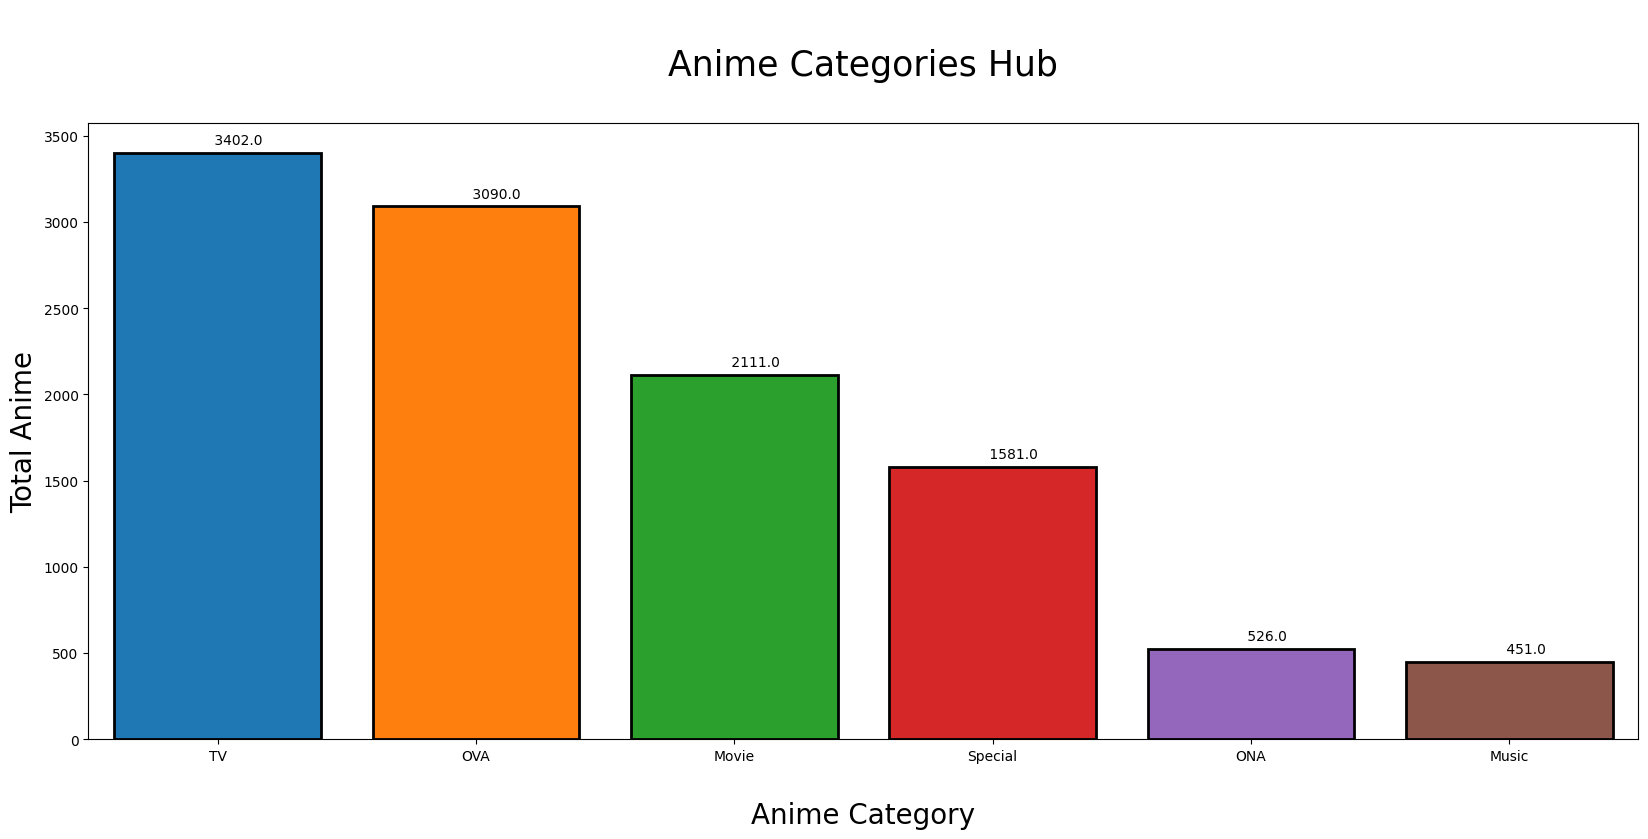

In [18]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x=top_anime_temp1["type"],order=top_anime_temp1["type"].value_counts().index,saturation = 1, edgecolor = "black", linewidth = 2)
p.set_title("\nAnime Categories Hub\n" ,fontsize = 25)

plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)

for pi in p.patches:
        p.annotate('                 {:}'.format(pi.get_height()), (pi.get_x()+0.1, pi.get_height()+50))

plt.show()

<a id="12"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Anime Genres</p>


In [19]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total unique genres are {len(top_anime_temp3["genre"].unique())}')
print(f'Occurances of unique genres :')
top_anime_temp3["genre"].value_counts().to_frame().T

Total unique genres are 43
Occurances of unique genres :


,Comedy,Action,Adventure,Fantasy,Sci-Fi,Drama,Shounen,Romance,Kids,School,...,Game,Samurai,Vampire,Thriller,Cars,Shounen Ai,Shoujo Ai,Josei,Yuri,Yaoi
genre,4271,2686,2197,2107,1981,1857,1636,1420,1306,1135,...,161,142,97,84,65,61,54,52,41,37


let's explore how genre's wordcloud looks like



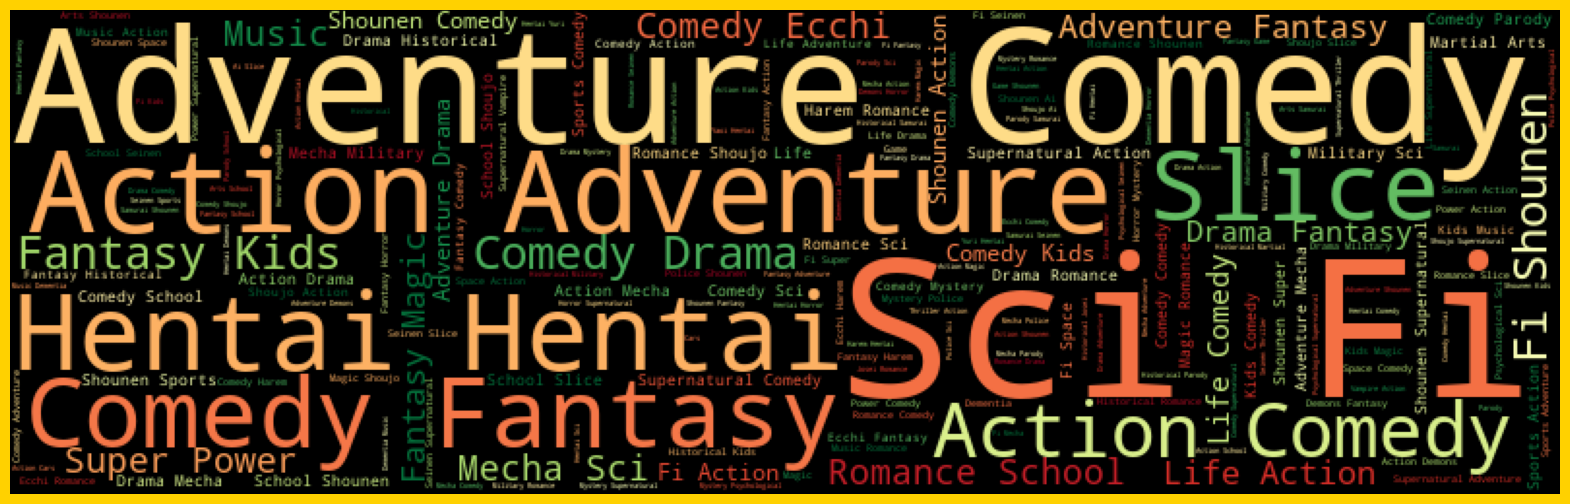

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250, background_color ="black",colormap ="RdYlGn",
                      max_font_size=100, stopwords =None,repeat= True).generate(top_anime["genre"].str.cat(sep=", | , | ,"))
print("let's explore how genre's wordcloud looks like\n")
plt.figure(figsize = (20, 10),facecolor = "#ffd100") 

plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [21]:
data= fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis=0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


In [22]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,1,2,3,5,7,8,9,10,11,12,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
import re

def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

data["name"] = data["name"].apply(text_cleaning)


In [24]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,1,2,3,5,7,8,9,10,11,12,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "auto")
model_knn.fit(data_matrix)



NearestNeighbors(metric='cosine')

In [30]:
query_no = np.random.choice(data_pivot.shape[0])
print(f"We will find recommendation for {query_no} no anime which is {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

We will find recommendation for 3739 no anime which is InuYasha: Kuroi Tessaiga.


In [31]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:        
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
rec = recommendation[recommendation['Rating']>7.0]
rec.set_index("No", inplace = True)

rec

Recommendations for InuYasha: Kuroi Tessaiga viewers :



,Anime Name,Rating
No,,
1,InuYasha: Guren no Houraijima,[7.62]
2,InuYasha: Tenka Hadou no Ken,[7.89]
3,InuYasha: Toki wo Koeru Omoi,[7.69]
4,InuYasha: Kagami no Naka no Mugenjo,[7.75]
5,InuYasha: Kanketsu-hen,[8.37]


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [46]:
rec_data

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9
...,...,...,...,...,...,...,...,...,...
11156,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,20171,7
11157,5543,Under World,Hentai,OVA,1,4.28,183,39532,-1
11158,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,27364,-1
11159,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,27364,-1


In [59]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()

def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title]

    sig_score = list(enumerate(sig[idx])) 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe[dataframe["Rating"]>7.0]


In [60]:
give_recommendation("Naruto")

Recommendations for Naruto viewers :



,Anime Name,Rating
No,,
1,To LOVE-Ru Darkness OVA,7.82
2,Hanbun no Tsuki ga Noboru Sora,7.69
3,Mai-HiME,7.59
4,Doraemon Movie 28: Nobita to Midori no Kyojin Den,7.54
5,Rurouni Kenshin Special,7.51
6,Pikmin Short Movies,7.27
7,Deadman Wonderland OVA,7.12
10,Toaru Majutsu no Index: Endymion no Kiseki,7.71
